In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
from pathlib import Path
import pandas as pd

In [3]:
#path = Path('/home/ubuntu/data/autopsy/milestone/suicide_homicide_accident/no_preprocessing')
path = Path('/nfs/research/ejguill/data/autopsy/no_preprocessing/folds/tmp')


In [4]:
df = pd.read_csv(path/'data.csv')
#df.head()

In [5]:
#df.tail()

In [6]:
bs=32

In [7]:
data_clas = TextClasDataBunch.from_csv(path, 'data.csv', bs=bs)

In [8]:
data_clas.show_batch()

text,target
"xxbos \n xxup .micro . \n xxmaj heart - no significant histopathology \n\n xxmaj lungs - patchy extravasation of red blood cells into the intra - alveolar space \n\n xxmaj kidneys - no significant histopathology \n\n xxmaj liver - no significant histopathology \n\n xxmaj hippocampus - no significant histopathology \n\n xxmaj xxunk - vaginal , anal , and oral smears negative for xxunk components . \n .locationhead and neck \n",Homicide
"xxbos \n xxup .micro . \n xxup brain : xxmaj no significant , histopathologic findings \n\n xxup heart : xxmaj no significant , histopathologic findings \n\n xxup lungs : xxmaj no significant , histopathologic findings \n\n xxup kidneys : xxmaj no significant , histopathologic findings \n\n xxup liver : xxmaj no significant , histopathologic findings \n\n\n .locationextremity \n .injurysharp injury . \n xxup .injurydesc . \n xxmaj on the anterior",Homicide
xxbos \n xxup .micro . \n xxmaj heart : a few slightly enlarged cardiomyocyte nuclei are present . \n\n xxmaj lungs : xxmaj multiple alveoli are filled with degenerating erythrocytes and a few macrophages . \n\n xxmaj liver : xxmaj no significant histopathologic findings . \n\n xxmaj kidney : xxmaj no significant histopathologic findings . \n\n xxmaj brain : xxmaj no significant histopathologic findings . \n\n .locationother \n .injuryother .,Homicide
xxbos \n xxup .micro . \n xxmaj the liver is organized into plates of hepatocytes 1 - 2 cell layers thick without steatosis or inflammation . xxmaj the portal tracts contain an appropriate number of bile ducts and blood vessels without inflammation or fibrosis . xxmaj the central veins are patent without thrombosis . \n\n xxmaj the pancreas has moderate autolytic changes . xxmaj no significant inflammation or fibrosis are,Homicide
"xxbos \n xxup .micro . \n xxup heart : xxmaj mild , interstitial fibrosis ; focal , geographic fibrosis of left ventricular myocardium ; patchy , myocyte hypertrophy \n\n xxup lung : xxmaj mild , septal clubbing ; alveolar expansion without fibrosis ; intraparenchymal lymph node without diagnostic abnormality \n\n xxup liver : xxmaj mild , predominantly lymphocytic inflammation with rare neutrophils ; minimal , lobular , macrosteatosis \n\n xxup",Homicide


In [9]:
learn = text_classifier_learner(data_clas, drop_mult=0.5, qrnn=True, emb_sz=100, nh=200, nl=1)


In [10]:
learn.unfreeze()
#learn.fit_one_cycle(10, slice(1e-4,1e-2), moms=(0.8,0.7))
learn.fit_one_cycle(10, 1e-3, moms=(0.95,0.8))

epoch,train_loss,valid_loss,accuracy
1,0.530415,0.409756,0.844401
2,0.462516,0.465217,0.845703
3,0.455632,0.335078,0.906901
4,0.432722,0.312017,0.916016
5,0.375840,0.338710,0.904297
6,0.282714,0.402677,0.879557
7,0.227810,0.393676,0.902344
8,0.182652,0.417535,0.903646
9,0.151458,0.448869,0.900391
10,0.214209,0.464396,0.893229


In [11]:
from fastai.vision import *

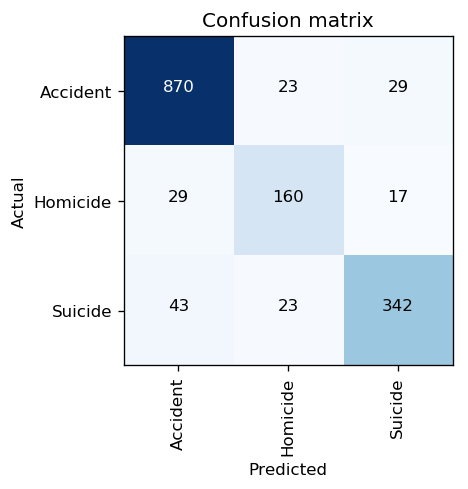

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

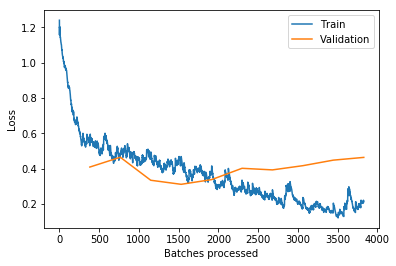

In [13]:
learn.recorder.plot_losses()

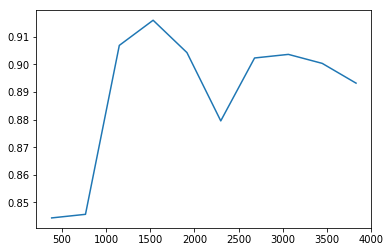

In [14]:
learn.recorder.plot_metrics()

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data_clas.valid_ds)==len(losses)==len(idxs)

True

In [16]:
loss = learn.recorder.losses

In [17]:
len(loss)

3830

In [18]:
len(learn.recorder.val_losses)

10

In [19]:
lrs = learn.recorder.lrs

In [20]:
len(lrs)

3830

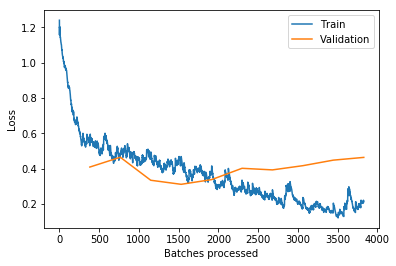

In [21]:
last = ifnone(None,len(learn.recorder.nb_batches))

_, ax = plt.subplots(1,1)
l_b = np.sum(learn.recorder.nb_batches[-last:])
iterations = range_of(learn.recorder.losses)[-l_b:]
ax.plot(iterations, learn.recorder.losses[-l_b:], label='Train')
val_iter = learn.recorder.nb_batches[-last:]
val_iter = np.cumsum(val_iter)+np.sum(learn.recorder.nb_batches[:-last])
ax.plot(val_iter, learn.recorder.val_losses[-last:], label='Validation')
ax.set_ylabel('Loss')
ax.set_xlabel('Batches processed')
ax.legend()

In [22]:
len(learn.metrics)

1

In [23]:
learn.metrics[0]

<function fastai.metrics.accuracy(input:torch.Tensor, targs:torch.Tensor) -> <function NewType.<locals>.new_type at 0x7f62bb7d3048>>

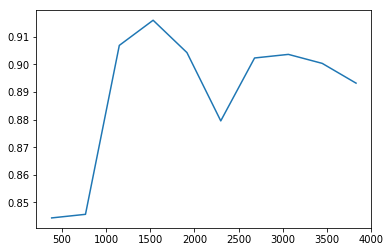

In [24]:
"Plot metrics collected during training."
assert len(learn.metrics) != 0, "There are no metrics to plot."
_, axes = plt.subplots(len(learn.metrics),1,figsize=(6, 4*len(learn.metrics)))
val_iter = learn.recorder.nb_batches
val_iter = np.cumsum(val_iter)
axes = axes.flatten() if len(learn.metrics) != 1 else [axes]
for i, ax in enumerate(axes):
    values = [met[i] for met in learn.recorder.metrics]
    ax.plot(val_iter, values)


In [25]:
learn.recorder.metrics

[[tensor(0.8444)],
 [tensor(0.8457)],
 [tensor(0.9069)],
 [tensor(0.9160)],
 [tensor(0.9043)],
 [tensor(0.8796)],
 [tensor(0.9023)],
 [tensor(0.9036)],
 [tensor(0.9004)],
 [tensor(0.8932)]]

In [26]:
val_iter

array([ 383,  766, 1149, 1532, 1915, 2298, 2681, 3064, 3447, 3830])

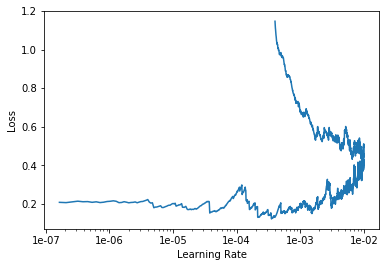

In [27]:
learn.recorder.plot()

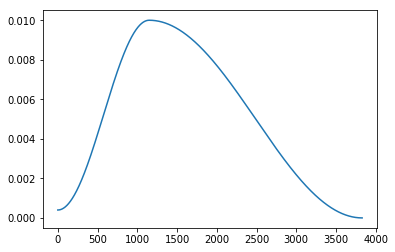

In [28]:
learn.recorder.plot_lr(show_moms=False)

In [29]:
learn.recorder.lrs

[0.0004,
 0.0004000179419920199,
 0.0004000717678339441,
 0.0004001614771233855,
 0.0004002870691896896,
 0.00040044854309395465,
 0.000400645897629023,
 0.00040087913131951064,
 0.0004011482424217984,
 0.00040145322892406153,
 0.00040179408854627147,
 0.0004021708187402183,
 0.0004025834166895316,
 0.0004030318793097013,
 0.0004035162032480933,
 0.0004040363848839875,
 0.00040459242032859187,
 0.0004051843054250822,
 0.00040581203574862473,
 0.0004064756066064143,
 0.000407175013037709,
 0.0004079102498138632,
 0.00040868131143837437,
 0.00040948819214691595,
 0.0004103308859073843,
 0.00041120938641994384,
 0.0004121236871170754,
 0.00041307378116362155,
 0.0004140596614568403,
 0.00041508132062645885,
 0.0004161387510347274,
 0.0004172319447764746,
 0.0004183608936791719,
 0.00041952558930298707,
 0.0004207260229408538,
 0.00042196218561853585,
 0.00042323406809468937,
 0.0004245416608609394,
 0.0004258849541419422,
 0.0004272639378954668,
 0.0004286786018124662,
 0.0004301289353171

In [36]:
learn.model.parameters

<bound method Module.parameters of SequentialRNN(
  (0): MultiBatchRNNCore(
    (encoder): Embedding(5260, 100, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(5260, 100, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): QRNNLayer(
        (linear): WeightDropout(
          (module): Linear(in_features=200, out_features=300, bias=True)
        )
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.2)
      (2): Linear(in_features=300, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1)
      (6): Linear(in_features=50, out_features=3, bias=True)
    )
  )
)>

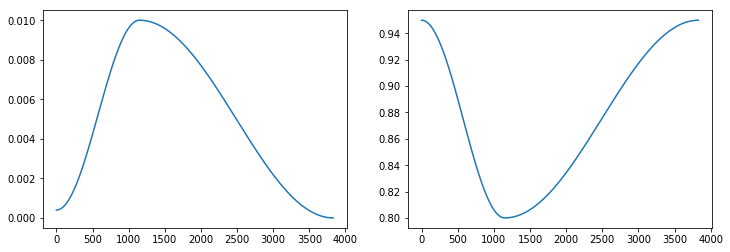

In [31]:
show_moms = True
"Plot learning rate, `show_moms` to include momentum."
iterations = range_of(learn.recorder.lrs)
if show_moms:
    _, axs = plt.subplots(1,2, figsize=(12,4))
    axs[0].plot(iterations, learn.recorder.lrs)
    axs[1].plot(iterations, learn.recorder.moms)
else: 
    plt.plot(iterations, learn.recorder.lrs)

In [37]:
learn.recorder.lrs

[0.0004,
 0.0004000179419920199,
 0.0004000717678339441,
 0.0004001614771233855,
 0.0004002870691896896,
 0.00040044854309395465,
 0.000400645897629023,
 0.00040087913131951064,
 0.0004011482424217984,
 0.00040145322892406153,
 0.00040179408854627147,
 0.0004021708187402183,
 0.0004025834166895316,
 0.0004030318793097013,
 0.0004035162032480933,
 0.0004040363848839875,
 0.00040459242032859187,
 0.0004051843054250822,
 0.00040581203574862473,
 0.0004064756066064143,
 0.000407175013037709,
 0.0004079102498138632,
 0.00040868131143837437,
 0.00040948819214691595,
 0.0004103308859073843,
 0.00041120938641994384,
 0.0004121236871170754,
 0.00041307378116362155,
 0.0004140596614568403,
 0.00041508132062645885,
 0.0004161387510347274,
 0.0004172319447764746,
 0.0004183608936791719,
 0.00041952558930298707,
 0.0004207260229408538,
 0.00042196218561853585,
 0.00042323406809468937,
 0.0004245416608609394,
 0.0004258849541419422,
 0.0004272639378954668,
 0.0004286786018124662,
 0.0004301289353171